<a href="https://colab.research.google.com/github/se-an-alytics/sports_analysis/blob/main/2021_2022_NBA_PER_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from google.colab import files
uploaded = files.upload()

import io
nba_df = pd.read_csv(io.BytesIO(uploaded['NBA_Player_Stats.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving NBA_Player_Stats.csv to NBA_Player_Stats (1).csv


In [197]:
# Get the number of rows and columns (14,573 rows or players and 31 columns or features)
nba_df.shape
nba_df.keys()

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [198]:
# filter the dataset so we can focus on the most recent season
nba_22 = nba_df[nba_df['Year'] == '2021-2022']
nba_22

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13773,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2021-2022
13774,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-2022
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022
14570,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-2022
14571,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-2022


In [199]:
# Find the average value for each numeric column
nba_22.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Rk      307.676214
Age      26.059776
G        36.701121
GS       16.692403
MP       18.260772
FG        2.869240
FGA       6.392902
FG%       0.433772
3P        0.871482
3PA       2.564259
3P%       0.303168
2P        1.999253
2PA       3.831382
2P%       0.505206
eFG%      0.496786
FT        1.209963
FTA       1.582192
FT%       0.747412
ORB       0.812080
DRB       2.513450
TRB       3.324533
AST       1.811333
STL       0.583686
BLK       0.353674
TOV       0.979328
PF        1.566376
PTS       7.816438
dtype: float64

In [200]:
# Get the mean / average of specific column
nba_22.loc[:, 'FG'].mean()

2.8692403486924034

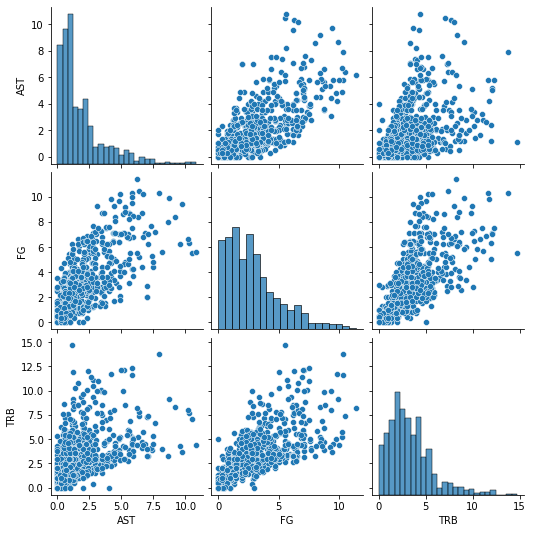

In [ ]:
# Make a pairwise scatter plot
sns.pairplot(nba_22[['AST', 'FG', 'TRB']])

In [201]:
nba_22.corr()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.041337,-0.067660,-0.089701,-0.051357,-0.058170,-0.057511,-0.001656,-0.054254,-0.056823,...,-0.025744,-0.029089,-0.075760,-0.067316,0.003872,-0.019622,-0.018090,-0.022309,-0.003026,-0.059771
Age,-0.041337,1.000000,0.044095,0.056626,0.148957,0.093139,0.089417,0.059259,0.118278,0.102781,...,0.059010,0.022125,0.136070,0.111105,0.172320,0.076233,0.045743,0.098245,0.134756,0.098464
G,-0.067660,0.044095,1.000000,0.682802,0.619947,0.563917,0.541676,0.264889,0.479581,0.459722,...,0.148841,0.291781,0.516635,0.487100,0.387712,0.425098,0.336115,0.423923,0.468325,0.558804
GS,-0.089701,0.056626,0.682802,1.000000,0.751456,0.734614,0.712257,0.205612,0.535103,0.527979,...,0.139449,0.349532,0.655074,0.610504,0.565147,0.521244,0.406110,0.616720,0.536978,0.730731
MP,-0.051357,0.148957,0.619947,0.751456,1.000000,0.887270,0.898353,0.236424,0.721937,0.733730,...,0.262945,0.353499,0.756199,0.687863,0.728506,0.716072,0.443732,0.770348,0.741906,0.887224
FG,-0.058170,0.093139,0.563917,0.734614,0.887270,1.000000,0.971290,0.314334,0.685797,0.685809,...,0.215738,0.376120,0.762686,0.699826,0.711135,0.618204,0.444200,0.811863,0.649704,0.990138
FGA,-0.057511,0.089417,0.541676,0.712257,0.898353,0.971290,1.000000,0.151216,0.769083,0.797861,...,0.268980,0.251865,0.696916,0.610248,0.745383,0.636622,0.355131,0.824670,0.613348,0.975857
FG%,-0.001656,0.059259,0.264889,0.205612,0.236424,0.314334,0.151216,1.000000,0.000358,-0.087736,...,-0.103437,0.418156,0.334841,0.388361,0.070052,0.133531,0.366827,0.148043,0.350650,0.271479
3P,-0.054254,0.118278,0.479581,0.535103,0.721937,0.685797,0.769083,0.000358,1.000000,0.969745,...,0.366317,-0.114329,0.365196,0.241815,0.536324,0.501903,0.089601,0.539009,0.381772,0.734369
3PA,-0.056823,0.102781,0.459722,0.527979,0.733730,0.685809,0.797861,-0.087736,0.969745,1.000000,...,0.366900,-0.127941,0.375076,0.244838,0.560952,0.513919,0.084758,0.571515,0.386077,0.732527


In [202]:
# now we want to filter down the number of players within this past season
# who have AT LEAST a combined 1,000 total minutes played.
nba_22 = nba_22[nba_22['MP'] * nba_22['G'] >= 1000]
nba_22
#nba_09 = nba_09[nba_09['MP'] * nba_09['G'] >= 1000]
#nba_09

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13774,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022
13775,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,590,Ziaire Williams,SF,20,MEM,62,31,21.7,3.1,6.8,...,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1,2021-2022
14558,595,Christian Wood,C,26,HOU,68,67,30.8,6.5,12.9,...,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,2021-2022
14560,597,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,...,0.6,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,2021-2022
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022


In [203]:
# just for curiosity purposes, I wanted to see the 10 players that made the
# >= 1,000 MP cut off by the smallest margins
nba_22_lowest_mpg = nba_22.groupby('MP')['Player'].min()
nba_22_lowest_mpg.head(10)
#nba_09_lowest_mpg = nba_09.groupby('MP')['Player'].min()
#nba_09_lowest_mpg.head(10)

MP
14.1    Payton Pritchard
15.5          Josh Green
15.8        JaVale McGee
15.9      Dewayne Dedmon
16.0      Troy Brown Jr.
16.1       Lamar Stevens
16.2       Aaron Holiday
16.6           Tre Jones
16.9    Jonathan Kuminga
17.1         Bryn Forbes
Name: Player, dtype: object

In [204]:
# [ FGM x 85.910 + Steals x 53.897 + 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190
# + Assists x 34.677 + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190
# - TO x 53.897 ] x (1 / Minutes)
# formula obtained from: https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess
#nba_PER = nba_22.assign(PER = (nba_22['FG'] * 85.910 + nba_22['STL'] * 53.897 + nba_22['3P'] * 51.757 + nba_22['FT'] * 46.845 +
#                      nba_22['BLK'] * 39.190 + nba_22['ORB'] * 39.190 + nba_22['AST'] * 34.677 + nba_22['DRB'] * 14.707 - 
#                      nba_22['PF'] * 17.174 - (nba_22['FTA'] - nba_22['FT']) * 20.091 - (nba_22['FGA'] - nba_22['FG'] * 39.190) -
#                      nba_22['TOV'] * 53.897) * (1/(nba_22['MP'])))
nba_PER = nba_22.assign(PER = (nba_22['PTS'] + 0.4 *
                               nba_22['FG'] - 0.7 *
                               nba_22['FGA'] - 0.4 *
                               (nba_22['FTA'] - nba_22['FT']) + 0.7 *
                               nba_22['ORB'] + 0.3 *
                               nba_22['DRB'] + nba_22['STL'] + 0.7 *
                               nba_22['AST'] + 0.7 *
                               nba_22['BLK'] - 0.4 *
                               nba_22['PF'] - nba_22['TOV']))
nba_highest_PER = nba_PER.sort_values(by=['PER'], ascending=False)
nba_highest_PER.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
14152,290,Nikola Jokić,C,26,DEN,74,74,33.5,10.3,17.7,...,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,2021-2022,26.43
13785,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,...,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,2021-2022,25.60
13967,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,...,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,2021-2022,25.18
14129,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021-2022,23.93
13959,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,2021-2022,23.74
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022,22.17
13939,141,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,...,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,2021-2022,21.93
14287,390,Ja Morant,PG,22,MEM,57,57,33.1,10.2,20.6,...,4.4,5.7,6.7,1.2,0.4,3.4,1.5,27.4,2021-2022,20.81
13928,134,DeMar DeRozan,PF,32,CHI,76,76,36.1,10.2,20.2,...,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9,2021-2022,20.47
14117,266,Kyrie Irving,PG,29,BRK,29,29,37.6,10.0,21.2,...,3.8,4.4,5.8,1.4,0.6,2.5,2.8,27.4,2021-2022,20.26


In [205]:
nba_highest_PER.corr()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
Rk,1.000000,-0.128473,0.049801,-0.070165,-0.107046,-0.081031,-0.086780,0.047729,-0.050031,-0.051210,...,0.013500,-0.078794,-0.054147,-0.032710,-0.083083,0.010303,-0.044621,0.055499,-0.087343,-0.084667
Age,-0.128473,1.000000,-0.147951,-0.018347,0.041060,-0.006324,-0.018606,0.009905,0.079537,0.052385,...,-0.068756,0.050046,0.014736,0.081766,0.024377,-0.014090,-0.007328,-0.010052,0.013920,0.058003
G,0.049801,-0.147951,1.000000,0.248299,-0.142148,-0.125393,-0.150509,0.104190,-0.027820,-0.071912,...,0.077736,-0.045995,-0.006095,-0.134494,-0.106738,-0.082088,-0.176446,-0.044489,-0.138391,-0.112167
GS,-0.070165,-0.018347,0.248299,1.000000,0.729787,0.549470,0.506060,0.155414,0.228761,0.222850,...,0.274650,0.468737,0.442651,0.420151,0.363659,0.224391,0.474171,0.434085,0.531713,0.583937
MP,-0.107046,0.041060,-0.142148,0.729787,1.000000,0.815290,0.826555,-0.073423,0.525441,0.541684,...,0.059696,0.487279,0.384010,0.653486,0.512167,0.122138,0.704776,0.368471,0.824242,0.803604
FG,-0.081031,-0.006324,-0.125393,0.549470,0.815290,1.000000,0.956981,0.088640,0.446355,0.464964,...,0.127918,0.553194,0.454722,0.625631,0.364336,0.171990,0.781177,0.319513,0.984424,0.937837
FGA,-0.086780,-0.018606,-0.150509,0.506060,0.826555,0.956981,1.000000,-0.180615,0.616794,0.653408,...,-0.073722,0.420357,0.288055,0.665081,0.394720,0.028122,0.788518,0.246367,0.968847,0.850884
FG%,0.047729,0.009905,0.104190,0.155414,-0.073423,0.088640,-0.180615,1.000000,-0.575324,-0.632201,...,0.715895,0.389123,0.530068,-0.154738,-0.130115,0.502430,-0.041824,0.273647,-0.000613,0.230754
3P,-0.050031,0.079537,-0.027820,0.228761,0.525441,0.446355,0.616794,-0.575324,1.000000,0.982413,...,-0.530105,-0.098393,-0.252116,0.349821,0.254486,-0.324240,0.333611,-0.081579,0.525946,0.318119
3PA,-0.051210,0.052385,-0.071912,0.222850,0.541684,0.464964,0.653408,-0.632201,0.982413,1.000000,...,-0.532483,-0.072627,-0.233298,0.387039,0.270789,-0.305676,0.382858,-0.062263,0.547074,0.328979


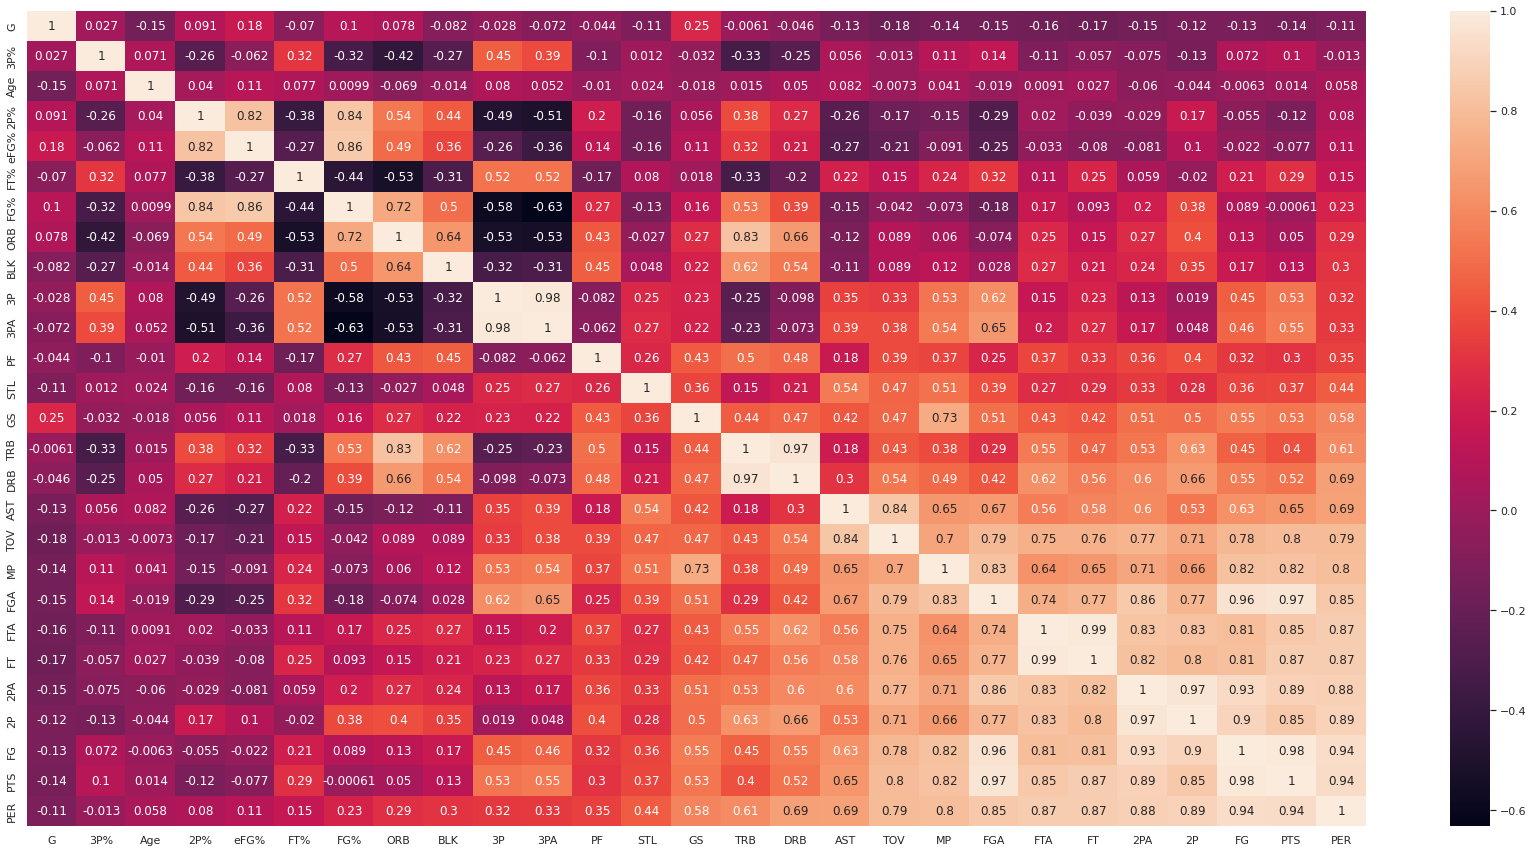

In [206]:
# Make a heat map to see correlation in order from least to most correlated factors to PER
correlations = nba_highest_PER[['G', '3P%', 'Age', '2P%', 'eFG%', 'FT%', 'FG%', 'ORB', 'BLK', '3P', '3PA', 'PF', 
                                'STL', 'GS', 'TRB', 'DRB', 'AST', 'TOV', 'MP', 'FGA', 'FTA', 'FT', '2PA', '2P', 
                                'FG', 'PTS', 'PER']].corr()
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(correlations, annot=True)

In [207]:
import plotly.express as px
px.scatter(data_frame=nba_highest_PER, x='PTS', y='PER', color='Pos',
           log_x=True, hover_data=['Player'], trendline="ols", trendline_scope="overall",
           title='Game Score v. Points Per Game (PTS) in 2021-2022 NBA Season')

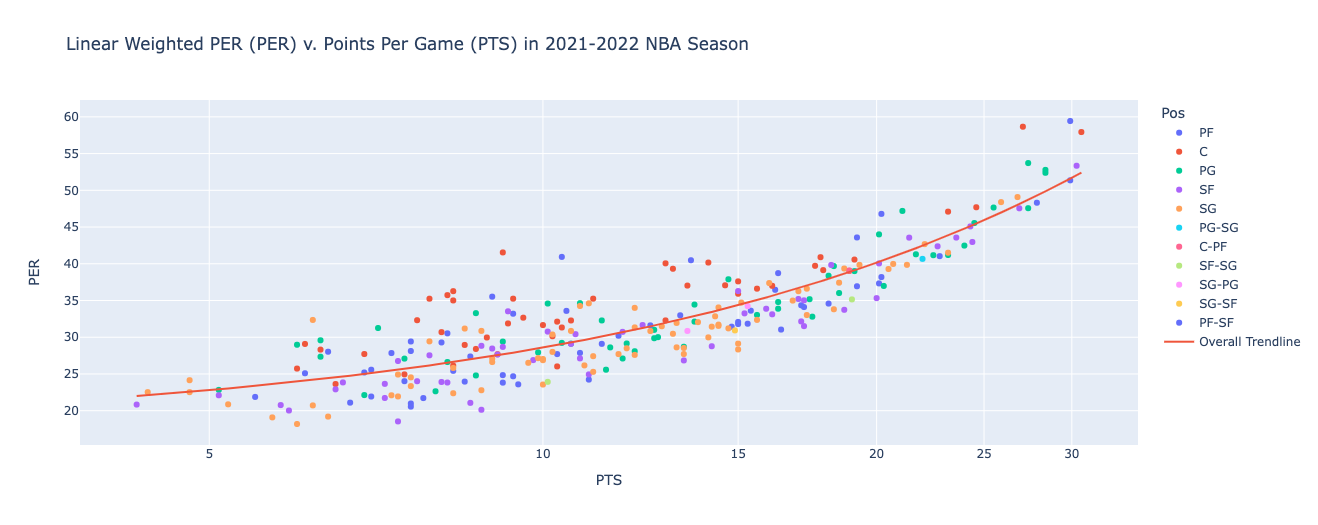

In [ ]:
nba_highest_PER.shape # 286 rows (or players) and 33 

(286, 33)

In [227]:
drop = ['Rk', 'Player', 'Year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP']
stats_train = nba_highest_PER.drop(columns=drop)
stats_train = stats_train.dropna(axis=1)
stats_train

,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,cluster
14152,10.3,17.7,0.583,1.3,3.9,9.0,13.8,0.652,0.620,5.1,...,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,26.43,7
13785,10.3,18.6,0.553,1.1,3.6,9.2,15.0,0.616,0.582,8.3,...,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,25.60,7
13967,9.8,19.6,0.499,1.4,3.7,8.4,15.9,0.529,0.534,9.6,...,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,25.18,7
14129,11.4,21.8,0.524,2.9,8.0,8.6,13.8,0.620,0.590,4.5,...,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,23.93,7
13959,10.5,20.3,0.518,2.1,5.5,8.4,14.8,0.568,0.570,6.8,...,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,23.74,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14462,2.5,5.1,0.489,0.3,1.0,2.2,4.0,0.543,0.517,0.8,...,1.9,2.6,0.7,0.5,0.3,0.7,1.7,6.1,4.25,1
14032,1.9,3.8,0.508,0.4,1.2,1.5,2.7,0.573,0.563,0.5,...,1.6,2.4,1.2,0.7,0.2,0.7,1.7,4.8,4.16,1
14390,2.2,5.2,0.417,1.2,3.4,1.0,1.8,0.563,0.530,0.5,...,1.4,1.7,1.3,0.8,0.1,0.8,1.8,6.0,4.05,1
14471,1.9,5.0,0.376,1.0,3.1,0.9,1.9,0.473,0.476,0.5,...,1.9,2.4,1.3,0.7,0.4,0.7,1.4,5.2,3.93,1


In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_scaled = pd.DataFrame(scaler.fit_transform(stats_train))
stats_scaled.columns=stats_train.columns


In [210]:
from sklearn.decomposition import PCA
n_components=stats_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled)

PCA(n_components=22, random_state=123)

In [211]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.501433,0.501433
1,2,0.241546,0.742979
2,3,0.055575,0.798555
3,4,0.046930,0.845485
4,5,0.039747,0.885232
5,6,0.025774,0.911006
6,7,0.022641,0.933647
7,8,0.020369,0.954016
8,9,0.013059,0.967076
9,10,0.012250,0.979326


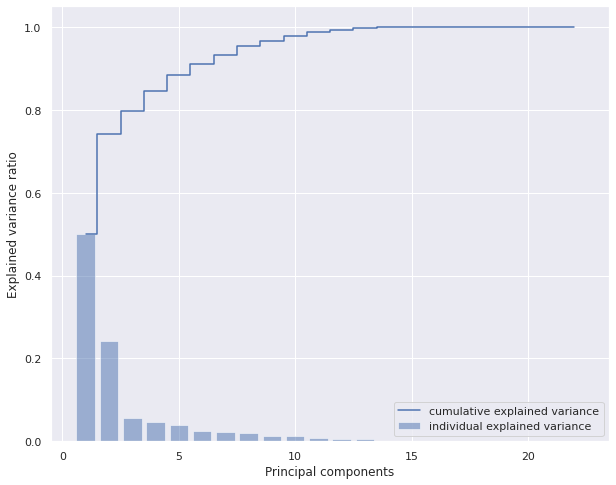

In [212]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

In [213]:
pca = PCA(n_components=10)
pca.fit(stats_scaled)

PCA(n_components=10)

In [214]:
stats_transformed = pca.fit_transform(stats_scaled)
stats_transformed.shape

(286, 10)

In [215]:
from sklearn.cluster import KMeans

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)

KMeans(random_state=123)

In [216]:
cluster_labels = kmeans.labels_
nba_highest_PER['cluster'] = cluster_labels
nba_highest_PER

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,cluster
14152,290,Nikola Jokić,C,26,DEN,74,74,33.5,10.3,17.7,...,13.8,7.9,1.5,0.9,3.8,2.6,27.1,2021-2022,26.43,7
13785,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,...,11.6,5.8,1.1,1.4,3.3,3.2,29.9,2021-2022,25.60,7
13967,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,...,11.7,4.2,1.1,1.5,3.1,2.7,30.6,2021-2022,25.18,7
14129,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021-2022,23.93,7
13959,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,7.4,6.4,0.9,0.9,3.5,2.1,29.9,2021-2022,23.74,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14462,519,Lamar Stevens,PF,24,CLE,63,13,16.1,2.5,5.1,...,2.6,0.7,0.5,0.3,0.7,1.7,6.1,2021-2022,4.25,1
14032,209,Josh Green,SG,21,DAL,67,3,15.5,1.9,3.8,...,2.4,1.2,0.7,0.2,0.7,1.7,4.8,2021-2022,4.16,1
14390,475,Austin Rivers,SG,29,DEN,67,18,22.1,2.2,5.2,...,1.7,1.3,0.8,0.1,0.8,1.8,6.0,2021-2022,4.05,1
14471,528,Garrett Temple,SG,35,NOP,59,16,18.6,1.9,5.0,...,2.4,1.3,0.7,0.4,0.7,1.4,5.2,2021-2022,3.93,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



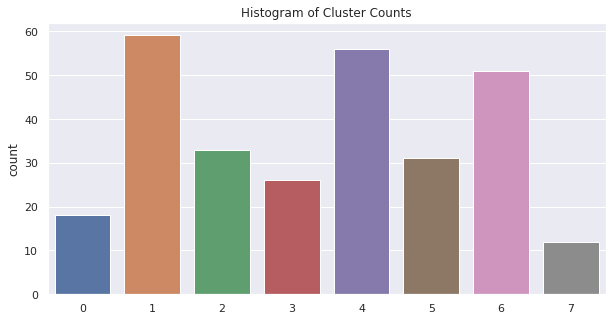

In [217]:
ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [218]:
# function used to compare clusters' stats
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = nba_highest_PER[nba_highest_PER['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [219]:
columns = stats_train.columns
cluster_comparisons = cluster_stats(columns)

In [186]:
cluster_comparisons

,cluster,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,0,63.32,62.52,32.34,6.64,13.35,0.50,1.17,3.55,5.46,...,2.03,6.87,8.92,3.28,0.87,0.92,2.19,2.75,17.65,14.55
1,1,64.46,15.88,20.43,2.76,6.12,0.45,0.90,2.63,1.87,...,0.85,2.71,3.57,1.68,0.68,0.36,0.87,1.67,7.40,6.08
2,2,62.53,57.53,32.22,6.03,13.75,0.44,2.17,5.94,3.86,...,0.73,3.59,4.31,4.47,1.02,0.36,2.05,2.17,16.81,12.43
3,3,63.26,17.81,25.11,3.95,9.51,0.42,1.97,5.42,1.98,...,0.52,2.67,3.20,2.14,0.79,0.28,1.11,1.80,11.24,7.86
4,4,59.68,59.68,35.22,8.97,19.01,0.47,2.20,6.23,6.77,...,0.99,5.66,6.64,6.46,1.20,0.56,3.20,2.28,25.49,19.73
5,5,64.60,20.67,19.73,3.85,6.11,0.63,0.17,0.46,3.69,...,1.87,3.73,5.60,1.17,0.50,0.87,0.95,2.24,9.55,9.06
6,6,71.22,58.00,28.19,3.84,8.54,0.45,1.58,4.33,2.26,...,0.85,3.40,4.26,2.33,0.95,0.60,1.11,2.30,10.52,8.54
7,7,67.33,63.27,26.78,4.05,6.62,0.61,0.13,0.45,3.91,...,3.13,6.14,9.28,2.11,0.81,1.33,1.39,2.59,9.87,11.28


In [220]:
cluster_0 = nba_highest_PER[nba_highest_PER['cluster'] == 0] #glass cleaners w/ a bag (josh hart is the only non-forward/center)
cluster_1 = nba_highest_PER[nba_highest_PER['cluster'] == 1] #role-players
cluster_2 = nba_highest_PER[nba_highest_PER['cluster'] == 2] #playmaking shot-creators (all but three guards listed)
cluster_3 = nba_highest_PER[nba_highest_PER['cluster'] == 3] #paint scorers (all bigs minus GP2)
cluster_4 = nba_highest_PER[nba_highest_PER['cluster'] == 4] #volume-shooters
cluster_5 = nba_highest_PER[nba_highest_PER['cluster'] == 5] #3&d, lengthy players
cluster_6 = nba_highest_PER[nba_highest_PER['cluster'] == 6] #catch and shoot specialists
cluster_7 = nba_highest_PER[nba_highest_PER['cluster'] == 7] #superstars

In [229]:
cluster_7[['Player', 'Pos', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'eFG%', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER']]

,Player,Pos,FG,FGA,FG%,3P,3PA,3P%,eFG%,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS,PER
14152,Nikola Jokić,C,10.3,17.7,0.583,1.3,3.9,0.337,0.620,6.3,0.810,13.8,7.9,1.5,0.9,3.8,27.1,26.43
13785,Giannis Antetokounmpo,PF,10.3,18.6,0.553,1.1,3.6,0.293,0.582,11.4,0.722,11.6,5.8,1.1,1.4,3.3,29.9,25.60
13967,Joel Embiid,C,9.8,19.6,0.499,1.4,3.7,0.371,0.534,11.8,0.814,11.7,4.2,1.1,1.5,3.1,30.6,25.18
14129,LeBron James,SF,11.4,21.8,0.524,2.9,8.0,0.359,0.590,6.0,0.756,8.2,6.2,1.3,1.1,3.5,30.3,23.93
13959,Kevin Durant,PF,10.5,20.3,0.518,2.1,5.5,0.383,0.570,7.4,0.910,7.4,6.4,0.9,0.9,3.5,29.9,23.74
13939,Luka Dončić,PG,9.9,21.6,0.457,3.1,8.8,0.353,0.529,7.5,0.744,9.1,8.7,1.2,0.6,4.5,28.4,21.93
14287,Ja Morant,PG,10.2,20.6,0.493,1.5,4.5,0.344,0.530,7.3,0.761,5.7,6.7,1.2,0.4,3.4,27.4,20.81
13928,DeMar DeRozan,PF,10.2,20.2,0.504,0.7,1.9,0.352,0.521,7.8,0.877,5.2,4.9,0.9,0.3,2.4,27.9,20.47
13921,Anthony Davis,C,9.3,17.4,0.532,0.3,1.8,0.186,0.542,6.1,0.713,9.9,3.1,1.2,2.3,2.1,23.2,20.03
14497,Karl-Anthony Towns,C,8.7,16.4,0.529,2.0,4.9,0.410,0.591,6.3,0.822,9.8,3.6,1.0,1.1,3.1,24.6,19.89


In [222]:
px.scatter(data_frame=nba_highest_PER, x='PER', y='cluster', color='cluster',
           log_x=True, hover_data=['Player', 'Age', 'Tm', 'Pos', 'PTS', 'AST', 'TRB'], #trendline="ols", trendline_scope="overall",
           title='Game Score (PER) Calculated Upon Season Averages v. Player Archetype in 2021-2022 NBA Season')

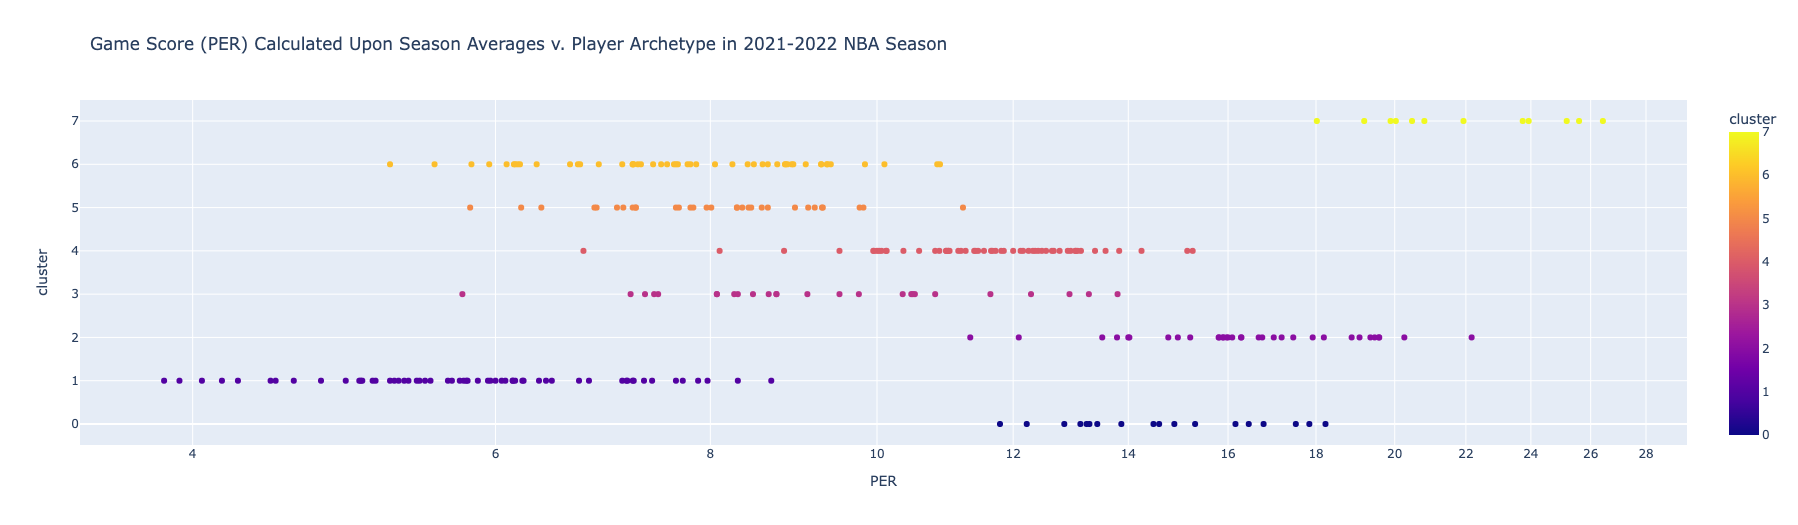

In [248]:
print('avg PER for players in cluster 0:', cluster_0.loc[:, 'PER'].mean())
print('avg PER for players in cluster 1:', cluster_1.loc[:, 'PER'].mean())
print('avg PER for players in cluster 2:', cluster_2.loc[:, 'PER'].mean())
print('avg PER for players in cluster 3:', cluster_3.loc[:, 'PER'].mean())
print('avg PER for players in cluster 4:', cluster_4.loc[:, 'PER'].mean())
print('avg PER for players in cluster 5:', cluster_5.loc[:, 'PER'].mean())
print('avg PER for players in cluster 6:', cluster_6.loc[:, 'PER'].mean())
print('avg PER for players in cluster 7:', cluster_7.loc[:, 'PER'].mean())

# the most efficient archetypes in order (top 5 Player Efficiency Rating per cluster):
# 1) cluster 7 (superstars: nikola jokić, giannis antetokounmpo, joel embiid, lebron james, kevin durant)
# 2) cluster 2 (playmaking shot-creators: trae young, kyrie irving, dejounte murray, james harden, jayson tatum)
# 3) cluster 0 (glass cleaners with offense: domantas sabonis, rudy gobert, bam adebayo, jarrett allen, kristaps porziņģis)
# 4) cluster 4 (volume shooters: tyrese haliburton, terry rozier, d'angelo russell, tyrese maxey, tobias harris)
# 5) cluster 3 (paint scorers: robert williams, montrezl harrell, clint capela, myles turner, mitchell robinson)
# 6) cluster 5 (3&d: al horford, draymond green, mo bamba, dorian finney-smith, terance mann)
# 7) cluster 6 (catch & shoot specialists: monte morris, kevin love, malik monk, cameron johnson, alec burks)
# 8) cluster 1 (role-players/bench: tyus jones, trey lyles, cody martin, caleb martin, nicolas batum)

avg PER for players in cluster 0: 14.781666666666666
avg PER for players in cluster 1: 5.921355932203391
avg PER for players in cluster 2: 16.584848484848486
avg PER for players in cluster 3: 9.51576923076923
avg PER for players in cluster 4: 11.633214285714287
avg PER for players in cluster 5: 8.082580645161292
avg PER for players in cluster 6: 7.835686274509805
avg PER for players in cluster 7: 22.102499999999996
